# What is the most optimal skill to learn for Data Analysts?

### Methodology
1. Group skills to determine median salary and likelihood of being in posting
2. Visualize median salary vs percent skill demand

In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load data, Author: Luke Barousse, Site: Hugging Face
df = pd.read_csv("hf://datasets/lukebarousse/data_jobs/data_jobs.csv")

# Data Cleanup (job_skills to list and dates with correct format)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [11]:
df_mexico = df[(df['job_country'] =='Mexico') & (df['job_title_short'] == 'Data Analyst')].copy()

In [12]:
df_mexico = df_mexico.dropna(subset=['salary_year_avg'])
df_mexico_exploded = df_mexico.explode('job_skills')
df_mexico_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
5478,70500.0,sql
116903,99150.0,python
116903,99150.0,plotly
116903,99150.0,pandas
116903,99150.0,seaborn


In [15]:
df_skills = df_mexico_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_skills = df_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})
df_skills

,skill_count,median_salary
job_skills,,
excel,16,98825.0
tableau,13,80850.0
power bi,12,89675.0
sql,11,111175.0
python,8,111175.0
sheets,7,57500.0
looker,5,111175.0
r,4,111175.0
aws,3,111175.0


In [16]:
# Calculate the percentage of job postings that mention each skill
da_job_count = len(df_mexico)


df_skills['skill_percentage'] = (df_skills['skill_count'] / da_job_count) * 100
df_skills

,skill_count,median_salary,skill_percentage
job_skills,,,
excel,16,98825.0,43.243243
tableau,13,80850.0,35.135135
power bi,12,89675.0,32.432432
sql,11,111175.0,29.729730
python,8,111175.0,21.621622
sheets,7,57500.0,18.918919
looker,5,111175.0,13.513514
r,4,111175.0,10.810811
aws,3,111175.0,8.108108


In [18]:
# Variable for the skill visualization (greater than 5% of job postings)
skill_percent = 5
df_skills_demand = df_skills[df_skills['skill_percentage'] > skill_percent]

df_skills_demand



,skill_count,median_salary,skill_percentage
job_skills,,,
excel,16,98825.0,43.243243
tableau,13,80850.0,35.135135
power bi,12,89675.0,32.432432
sql,11,111175.0,29.729730
python,8,111175.0,21.621622
sheets,7,57500.0,18.918919
looker,5,111175.0,13.513514
r,4,111175.0,10.810811
aws,3,111175.0,8.108108


In [35]:
df_technologies = df['job_type_skills'].copy()
df_technologies.dropna(inplace=True)
df_technologies.drop_duplicates(inplace=True)

In [41]:
# Dictionary to separate skills into categories
categories_dict = {}
for row in df_technologies:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in categories_dict:
            categories_dict[key] += (value)
        else:
            categories_dict[key] = [value]

# Remove duplicates in the dictionary values, flattening any nested lists
for key, value in categories_dict.items():
    flat = []
    for v in value:
        if isinstance(v, list):
            flat.extend(v)
        else:
            flat.append(v)
    categories_dict[key] = list(set(flat))

# Create a DataFrame from the categories dictionary
df_categories = pd.DataFrame(list(categories_dict.items()), columns=['technology', 'skills'])
df_categories

,technology,skills
0,analyst_tools,"[power bi, dax, outlook, spss, ms access, shar..."
1,programming,"[vba, nosql, groovy, perl, visual basic, kotli..."
2,cloud,"[openstack, heroku, digitalocean, oracle, aws,..."
3,libraries,"[dlib, tensorflow, selenium, react, tidyverse,..."
4,other,"[jenkins, unity, github, chef, bitbucket, pupp..."
5,databases,"[postgresql, mariadb, firestore, db2, couchbas..."
6,os,"[redhat, wsl, ubuntu, centos, windows, kali, d..."
7,async,"[trello, wrike, dingtalk, jira, monday.com, mi..."
8,webframeworks,"[flask, blazor, drupal, laravel, fastapi, node..."
9,sync,"[zoom, wire, mattermost, twilio, microsoft tea..."


In [42]:
# Explode the skills
df_categories_exploded = df_categories.explode('skills')
df_categories_exploded

,technology,skills
0,analyst_tools,power bi
0,analyst_tools,dax
0,analyst_tools,outlook
0,analyst_tools,spss
0,analyst_tools,ms access
...,...,...
9,sync,webex
9,sync,ringcentral
9,sync,symphony
9,sync,google chat


In [44]:
# Merge the dataframes
df_merged = df_skills_demand.merge(df_categories_exploded, left_on='job_skills', right_on='skills')
df_merged

,skill_count,median_salary,skill_percentage,technology,skills
0,16,98825.0,43.243243,analyst_tools,excel
1,13,80850.0,35.135135,analyst_tools,tableau
2,12,89675.0,32.432432,analyst_tools,power bi
3,11,111175.0,29.729730,programming,sql
4,8,111175.0,21.621622,programming,python
5,7,57500.0,18.918919,analyst_tools,sheets
6,5,111175.0,13.513514,analyst_tools,looker
7,4,111175.0,10.810811,programming,r
8,3,111175.0,8.108108,cloud,aws
9,3,53014.0,8.108108,webframeworks,express


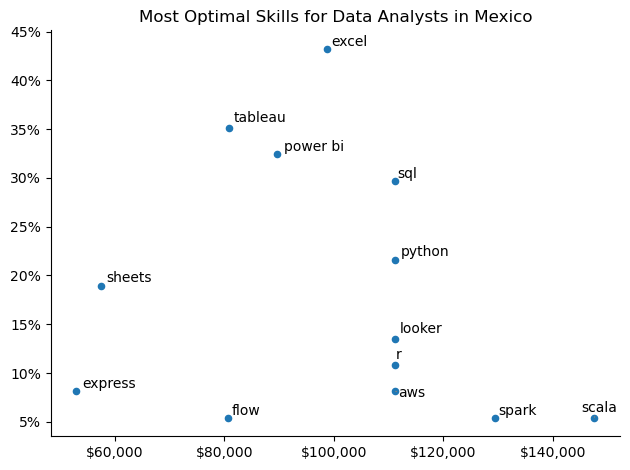

In [29]:
from adjustText import adjust_text

df_skills_demand.plot(kind='scatter', x='median_salary', y='skill_percentage')

# Adjust text labels to avoid overlap
texts = []
for i, text in enumerate(df_skills_demand.index):
    texts.append(plt.text(df_skills_demand['median_salary'].iloc[i],
                          df_skills_demand['skill_percentage'].iloc[i],
                          text))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

# Format ylabels to show percentage
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

# Format xlabels to show currency
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.xlabel('')
plt.ylabel('')
plt.title('Most Optimal Skills for Data Analysts in Mexico')
sns.despine()

plt.tight_layout()
plt.show()

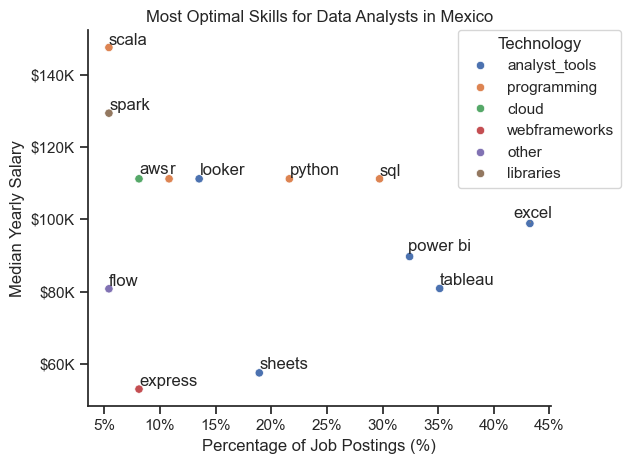

In [59]:
from adjustText import adjust_text

sns.scatterplot(data=df_merged, x='skill_percentage',
                y='median_salary',
                hue='technology')
sns.set_theme(style='ticks')

# Adjust text labels to avoid overlap
texts = []
for i, text in enumerate(df_skills_demand.index):
    texts.append(plt.text(df_skills_demand['skill_percentage'].iloc[i],
                          df_skills_demand['median_salary'].iloc[i],
                          text))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

# Format xlabels to show percentage
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

# Format ylabels to show currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1000:.0f}K'))

plt.xlabel('Percentage of Job Postings (%)')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in Mexico')
sns.despine()

# Adjust the legend of the plot
plt.legend(title='Technology', bbox_to_anchor=(0.8, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()